In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
import seaborn as sns
import random
random.seed(1)

In [2]:
data=pd.read_csv('2015.csv',sep=',')
data

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,72.0,11.0,b'12162015',b'12',b'16',b'2015',1100.0,2.015005e+09,2.015005e+09,NaN,...,4.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,2.0,2.0
441452,72.0,11.0,b'12142015',b'12',b'14',b'2015',1100.0,2.015005e+09,2.015005e+09,NaN,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,1.0
441453,72.0,11.0,b'12232015',b'12',b'23',b'2015',1200.0,2.015005e+09,2.015005e+09,NaN,...,9.0,9.0,3.0,3.0,4.0,9.0,9.0,9.0,9.0,NaN
441454,72.0,11.0,b'12152015',b'12',b'15',b'2015',1100.0,2.015005e+09,2.015005e+09,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0


In [11]:
data.shape


(441456, 330)

In [12]:
data.columns

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENUM',
       ...
       '_PAREC1', '_PASTAE1', '_LMTACT1', '_LMTWRK1', '_LMTSCL1', '_RFSEAT2',
       '_RFSEAT3', '_FLSHOT6', '_PNEUMO2', '_AIDTST3'],
      dtype='object', length=330)

In [29]:
# select specific columns
clean = data[['_MICHD', 
                                         '_RFHYPE5',  
                                         'TOLDHI2', 
                                         '_BMI5', 
                                         'SMOKE100', 
                                         'CVDSTRK3', 'DIABETE3', 
                                         '_TOTINDA', 
                                         '_VEGLT1', 
                                         '_RFDRHV5', 
                                          'MENTHLTH', 'PHYSHLTH',  
                                         'SEX', '_AGEG5YR' ]]
clean.shape

(441456, 14)

In [30]:
clean.head()

,_MICHD,_RFHYPE5,TOLDHI2,_BMI5,SMOKE100,CVDSTRK3,DIABETE3,_TOTINDA,_VEGLT1,_RFDRHV5,MENTHLTH,PHYSHLTH,SEX,_AGEG5YR
0,2.0,2.0,1.0,4018.0,1.0,2.0,3.0,2.0,1.0,1.0,18.0,15.0,2.0,9.0
1,2.0,1.0,2.0,2509.0,1.0,2.0,3.0,1.0,2.0,1.0,88.0,88.0,2.0,7.0
2,NaN,1.0,1.0,2204.0,NaN,1.0,3.0,9.0,9.0,9.0,88.0,15.0,2.0,11.0
3,2.0,2.0,1.0,2819.0,2.0,2.0,3.0,2.0,2.0,1.0,30.0,30.0,2.0,9.0
4,2.0,1.0,2.0,2437.0,2.0,2.0,3.0,2.0,1.0,1.0,88.0,20.0,2.0,9.0


In [55]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _MICHD    437514 non-null  float64
 1   _RFHYPE5  441456 non-null  float64
 2   TOLDHI2   382302 non-null  float64
 3   _BMI5     405058 non-null  float64
 4   SMOKE100  427201 non-null  float64
 5   CVDSTRK3  441456 non-null  float64
 6   DIABETE3  441449 non-null  float64
 7   _TOTINDA  441456 non-null  float64
 8   _VEGLT1   441456 non-null  float64
 9   _RFDRHV5  441456 non-null  float64
 10  MENTHLTH  441456 non-null  float64
 11  PHYSHLTH  441455 non-null  float64
 12  SEX       441456 non-null  float64
 13  _AGEG5YR  441456 non-null  float64
dtypes: float64(14)
memory usage: 47.2 MB


In [31]:
#Drop missing values:
#Drop Missing Values - knocks 100,000 rows out right away
new_clean = clean.dropna()
new_clean.shape

(343612, 14)

In [32]:
df= new_clean
df

,_MICHD,_RFHYPE5,TOLDHI2,_BMI5,SMOKE100,CVDSTRK3,DIABETE3,_TOTINDA,_VEGLT1,_RFDRHV5,MENTHLTH,PHYSHLTH,SEX,_AGEG5YR
0,2.0,2.0,1.0,4018.0,1.0,2.0,3.0,2.0,1.0,1.0,18.0,15.0,2.0,9.0
1,2.0,1.0,2.0,2509.0,1.0,2.0,3.0,1.0,2.0,1.0,88.0,88.0,2.0,7.0
3,2.0,2.0,1.0,2819.0,2.0,2.0,3.0,2.0,2.0,1.0,30.0,30.0,2.0,9.0
4,2.0,1.0,2.0,2437.0,2.0,2.0,3.0,2.0,1.0,1.0,88.0,20.0,2.0,9.0
5,2.0,2.0,2.0,2652.0,2.0,2.0,3.0,1.0,1.0,1.0,88.0,88.0,2.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,2.0,2.0,1.0,1842.0,2.0,2.0,1.0,2.0,2.0,1.0,88.0,88.0,2.0,11.0
441452,2.0,1.0,2.0,2834.0,2.0,2.0,3.0,1.0,2.0,1.0,88.0,88.0,2.0,2.0
441453,2.0,2.0,1.0,4110.0,1.0,2.0,3.0,9.0,9.0,1.0,20.0,88.0,2.0,11.0
441454,2.0,2.0,2.0,2315.0,2.0,2.0,3.0,2.0,1.0,1.0,88.0,88.0,1.0,7.0


In [18]:
df['_AGEG5YR'].value_counts()

10.0    43161
9.0     42971
8.0     39142
11.0    33695
7.0     32981
13.0    30912
12.0    24748
6.0     24314
5.0     19817
4.0     17150
3.0     13906
2.0      9882
1.0      8806
14.0     2121
Name: _AGEG5YR, dtype: int64

In order to do this part, I referenced the codebook which says what each column/feature/question is: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

In [33]:
# _MICHD
#Change 2 to 0 because this means did not have MI or CHD
df['_MICHD'] =df['_MICHD'].replace({2: 0})
df._MICHD.unique()

C:\Users\Natascha\AppData\Local\Temp\ipykernel_10552\65405866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['_MICHD'] =df['_MICHD'].replace({2: 0})


array([0., 1.])

In [34]:
#1 _RFHYPE5
#Change 1 to 0 so it represetnts No high blood pressure and 2 to 1 so it represents high blood pressure
df['_RFHYPE5'] = df['_RFHYPE5'].replace({1:0, 2:1})
df = df[df._RFHYPE5 != 9]
df._RFHYPE5.unique()

C:\Users\Natascha\AppData\Local\Temp\ipykernel_10552\2028624646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['_RFHYPE5'] = df['_RFHYPE5'].replace({1:0, 2:1})


array([1., 0.])

In [35]:
#2 TOLDHI2
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
df['TOLDHI2'] = df['TOLDHI2'].replace({2:0})
df = df[df.TOLDHI2 != 7]
df = df[df.TOLDHI2 != 9]
df.TOLDHI2.unique()

C:\Users\Natascha\AppData\Local\Temp\ipykernel_10552\3059569204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TOLDHI2'] = df['TOLDHI2'].replace({2:0})


array([1., 0.])

In [36]:
#4 _BMI5 (no changes, just note that these are BMI * 100. So for example a BMI of 4018 is really 40.18)
df['_BMI5'] = df['_BMI5'].div(100).round(0)
df._BMI5.unique()

array([40., 25., 28., 24., 27., 30., 26., 23., 34., 31., 33., 21., 22.,
       38., 20., 19., 32., 46., 41., 37., 36., 29., 35., 18., 54., 45.,
       39., 47., 43., 55., 49., 42., 17., 16., 48., 44., 50., 59., 15.,
       52., 53., 57., 51., 14., 58., 63., 61., 56., 60., 74., 62., 64.,
       13., 66., 73., 65., 68., 85., 71., 84., 67., 70., 82., 79., 92.,
       72., 88., 96., 81., 12., 77., 95., 75., 91., 69., 76., 87., 89.,
       83., 98., 86., 80., 90., 78., 97.])

In [37]:
#5 SMOKE100
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
df['SMOKE100'] = df['SMOKE100'].replace({2:0})
df = df[df.SMOKE100 != 7]
df = df[df.SMOKE100 != 9]
df.SMOKE100.unique()

array([1., 0.])

In [38]:
#6 CVDSTRK3
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
df['CVDSTRK3'] = df['CVDSTRK3'].replace({2:0})
df = df[df.CVDSTRK3 != 7]
df = df[df.CVDSTRK3 != 9]
df.CVDSTRK3.unique()

array([0., 1.])

In [39]:
#7 DIABETE3
# going to make this ordinal. 0 is for no diabetes or only during pregnancy, 1 is for pre-diabetes or borderline diabetes, 2 is for yes diabetes
# Remove all 7 (dont knows)
# Remove all 9 (refused)
df['DIABETE3'] = df['DIABETE3'].replace({2:0, 3:0, 1:2, 4:1})
df = df[df.DIABETE3 != 7]
df = df[df.DIABETE3 != 9]
df.DIABETE3.unique()

array([0., 2., 1.])

In [40]:
#8 _TOTINDA
# 1 for physical activity
# change 2 to 0 for no physical activity
# Remove all 9 (don't know/refused)
df['_TOTINDA'] = df['_TOTINDA'].replace({2:0})
df = df[df._TOTINDA != 9]
df._TOTINDA.unique()

array([0., 1.])

In [41]:
#10 _VEGLT1
# Change 2 to 0. this means no vegetables consumed per day. 1 will mean consumed 1 or more pieces of vegetable per day 
# remove all dont knows and missing 9
df['_VEGLT1'] = df['_VEGLT1'].replace({2:0})
df = df[df._VEGLT1 != 9]
df._VEGLT1.unique()

array([1., 0.])

In [42]:
#11 _RFDRHV5
# Change 1 to 0 (1 was no for heavy drinking). change all 2 to 1 (2 was yes for heavy drinking)
# remove all dont knows and missing 9
df['_RFDRHV5'] = df['_RFDRHV5'].replace({1:0, 2:1})
df = df[df._RFDRHV5 != 9]
df._RFDRHV5.unique()

array([0., 1.])

array([1., 0.])

array([0., 1.])

array([5., 3., 2., 4., 1.])

In [43]:
#15 MENTHLTH
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
df['MENTHLTH'] = df['MENTHLTH'].replace({88:0})
df = df[df.MENTHLTH != 77]
df = df[df.MENTHLTH != 99]
df.MENTHLTH.unique()

array([18.,  0., 30.,  3.,  5., 15., 10.,  6., 20.,  2., 25.,  1., 29.,
        4.,  7.,  8., 21., 14., 26.,  9., 16., 28., 11., 12., 24., 17.,
       13., 23., 27., 19., 22.])

In [44]:
#16 PHYSHLTH
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
df['PHYSHLTH'] = df['PHYSHLTH'].replace({88:0})
df = df[df.PHYSHLTH != 77]
df = df[df.PHYSHLTH != 99]
df.PHYSHLTH.unique()

array([15.,  0., 30., 20.,  2., 14., 28.,  7.,  3., 10.,  1.,  5., 17.,
        4., 19.,  6., 21., 12.,  8., 25., 27., 22., 29., 24.,  9., 16.,
       13., 18., 23., 26., 11.])

array([1., 0.])

In [45]:
#18 SEX
# in other words - is respondent male (somewhat arbitrarily chose this change because men are at higher risk for heart disease)
# change 2 to 0 (female as 0). Male is 1
df['SEX'] = df['SEX'].replace({2:0})
df.SEX.unique()

array([0., 1.])

In [46]:
#19 _AGEG5YR
# already ordinal. 1 is 18-24 all the way up to 13 wis 80 and older. 5 year increments.
# remove 14 because it is don't know or missing
df = df[df._AGEG5YR != 14]
df._AGEG5YR.unique()

array([ 9.,  7., 11., 10., 13.,  8.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

array([4., 6., 3., 5., 2., 1.])

array([3., 1., 8., 6., 4., 7., 2., 5.])

In [47]:
#Check the shape of the dataset now: We have 253,680 cleaned rows and 22 columns (1 of which is our dependent variable)
df.shape

(297560, 14)

In [48]:
#Let's see what the data looks like after Modifying Values
df.head()

,_MICHD,_RFHYPE5,TOLDHI2,_BMI5,SMOKE100,CVDSTRK3,DIABETE3,_TOTINDA,_VEGLT1,_RFDRHV5,MENTHLTH,PHYSHLTH,SEX,_AGEG5YR
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0
3,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,30.0,0.0,9.0
4,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20.0,0.0,9.0
5,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0


In [43]:
#Check Class Sizes of the heart disease column
df.groupby(['_MICHD']).size()

_MICHD
0.0    229787
1.0     23893
dtype: int64

In [49]:
#Make feature names more readable:

#Rename the columns to make them more readable
df = df.rename(columns = {'_MICHD':'HeartDisease', 
                                         '_RFHYPE5':'HiBP',  
                                         'TOLDHI2':'HiChol',  
                                         '_BMI5':'BMI', 
                                         'SMOKE100':'Smoker', 
                                         'CVDSTRK3':'Stroke', 'DIABETE3':'Diabetes', 
                                         '_TOTINDA':'Exercise', 
                                         '_VEGLT1':"Veggie", 
                                         '_RFDRHV5':'Alcohol', 
                                         'MENTHLTH':'MentHlth', 'PHYSHLTH':'PhysH', 
                                         'SEX':'Sex', '_AGEG5YR':'Age' })

In [50]:
df.head()

,HeartDisease,HiBP,HiChol,BMI,Smoker,Stroke,Diabetes,Exercise,Veggie,Alcohol,MentHlth,PhysH,Sex,Age
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0
3,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,30.0,0.0,9.0
4,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20.0,0.0,9.0
5,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0


In [52]:
df.shape

(297560, 14)

In [53]:
ndf = pd.DataFrame(df)
ndf

,HeartDisease,HiBP,HiChol,BMI,Smoker,Stroke,Diabetes,Exercise,Veggie,Alcohol,MentHlth,PhysH,Sex,Age
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0
3,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,30.0,0.0,9.0
4,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20.0,0.0,9.0
5,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441450,0.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,5.0
441451,0.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
441452,0.0,0.0,0.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
441454,0.0,1.0,0.0,23.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0


In [54]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297560 entries, 0 to 441455
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   HeartDisease  297560 non-null  float64
 1   HiBP          297560 non-null  float64
 2   HiChol        297560 non-null  float64
 3   BMI           297560 non-null  float64
 4   Smoker        297560 non-null  float64
 5   Stroke        297560 non-null  float64
 6   Diabetes      297560 non-null  float64
 7   Exercise      297560 non-null  float64
 8   Veggie        297560 non-null  float64
 9   Alcohol       297560 non-null  float64
 10  MentHlth      297560 non-null  float64
 11  PhysH         297560 non-null  float64
 12  Sex           297560 non-null  float64
 13  Age           297560 non-null  float64
dtypes: float64(14)
memory usage: 34.1 MB


In [56]:
# Convert columns to integer data type
columns_to_convert = ['HeartDisease', 'HiBP', 'HiChol', 'Smoker', 'Stroke', 'Diabetes', 'Exercise', 'Veggie', 'Alcohol', 'MentHlth', 'PhysH', 'Sex', 'Age']
ndf[columns_to_convert] = df[columns_to_convert].astype(int)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297560 entries, 0 to 441455
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   HeartDisease  297560 non-null  int32  
 1   HiBP          297560 non-null  int32  
 2   HiChol        297560 non-null  int32  
 3   BMI           297560 non-null  float64
 4   Smoker        297560 non-null  int32  
 5   Stroke        297560 non-null  int32  
 6   Diabetes      297560 non-null  int32  
 7   Exercise      297560 non-null  int32  
 8   Veggie        297560 non-null  int32  
 9   Alcohol       297560 non-null  int32  
 10  MentHlth      297560 non-null  int32  
 11  PhysH         297560 non-null  int32  
 12  Sex           297560 non-null  int32  
 13  Age           297560 non-null  int32  
dtypes: float64(1), int32(13)
memory usage: 19.3 MB


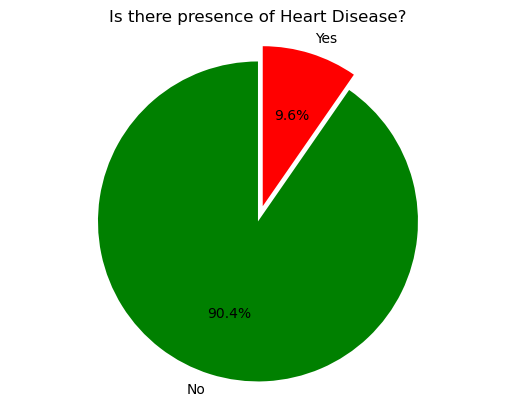

In [57]:
# Pie chart of value counts
hd = ndf['HeartDisease'].value_counts()
labels = ['No', 'Yes']
sizes = hd.values
colors = ['#ff9999', '#66b3ff']
explode = (0, 0.1)  # Explode the second slice (Yes)

plt.pie(sizes, labels=labels, colors=['green','red'], explode=explode, autopct='%1.1f%%', startangle=90)
plt.title('Is there presence of Heart Disease?')

plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'MentHlth'}>],
       [<AxesSubplot:title={'center':'PhysH'}>,
        <AxesSubplot:title={'center':'BMI'}>]], dtype=object)

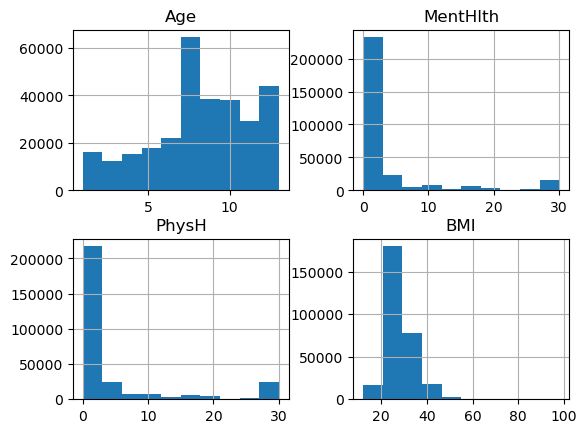

In [59]:
ndf[["Age", "MentHlth","PhysH","BMI"]].hist()

In [60]:
# Count the number of occurrences 
h= ndf['MentHlth'].value_counts()
h

0     207698
2      14856
30     14393
5      10203
1       9694
3       8420
10      7272
15      6432
4       4338
20      3930
7       3590
25      1380
14      1363
6       1141
8        748
12       473
28       372
21       263
29       192
9        118
18       115
16       104
27        89
22        67
17        64
13        53
26        50
23        46
11        43
24        35
19        18
Name: MentHlth, dtype: int64

In [61]:
# Count the number of occurrences 
p= ndf['PhysH'].value_counts()
p

0     187447
30     23729
2      16935
1      12918
3       9899
5       8843
10      6553
15      5903
7       5380
4       5285
20      3871
14      3071
6       1571
25      1569
8        969
21       795
12       682
28       613
29       269
9        213
18       178
16       134
27       123
17       111
24        84
13        82
22        82
26        82
11        72
23        69
19        28
Name: PhysH, dtype: int64

In [63]:
# Count the number of occurrences 
a= ndf['Age'].value_counts()
a

9     38359
10    38222
8     34973
7     29522
11    29036
13    23613
6     21930
12    20383
5     17772
4     15285
3     12281
2      8638
1      7546
Name: Age, dtype: int64

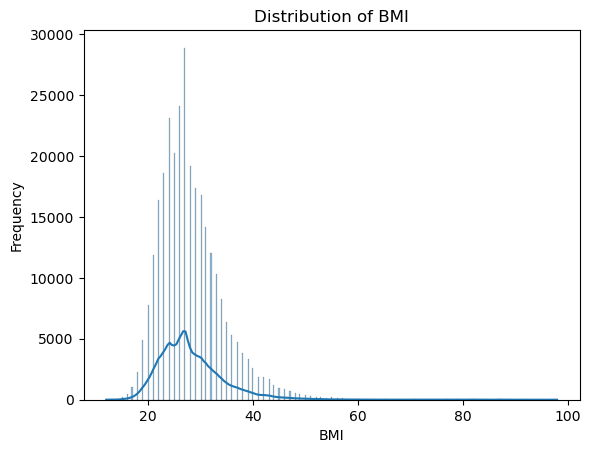

In [64]:
# Plot the histogram
sns.histplot(data=ndf, x='BMI', kde=True)

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')

# Show the plot
plt.show()

In [65]:
ndf.describe()

,HeartDisease,HiBP,HiChol,BMI,Smoker,Stroke,Diabetes,Exercise,Veggie,Alcohol,MentHlth,PhysH,Sex,Age
count,297560.000000,297560.000000,297560.000000,297560.000000,297560.000000,297560.000000,297560.000000,297560.000000,297560.000000,297560.000000,297560.000000,297560.000000,297560.000000,297560.000000
mean,0.096478,0.433714,0.425165,28.265056,0.439894,0.042395,0.300417,0.750151,0.808197,0.053435,3.178556,4.350410,0.428129,8.160018
std,0.295246,0.495588,0.494369,6.591770,0.496375,0.201489,0.701432,0.432926,0.393720,0.224899,7.442738,8.848133,0.494808,3.106151
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,0.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,3.000000,1.000000,10.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,13.000000


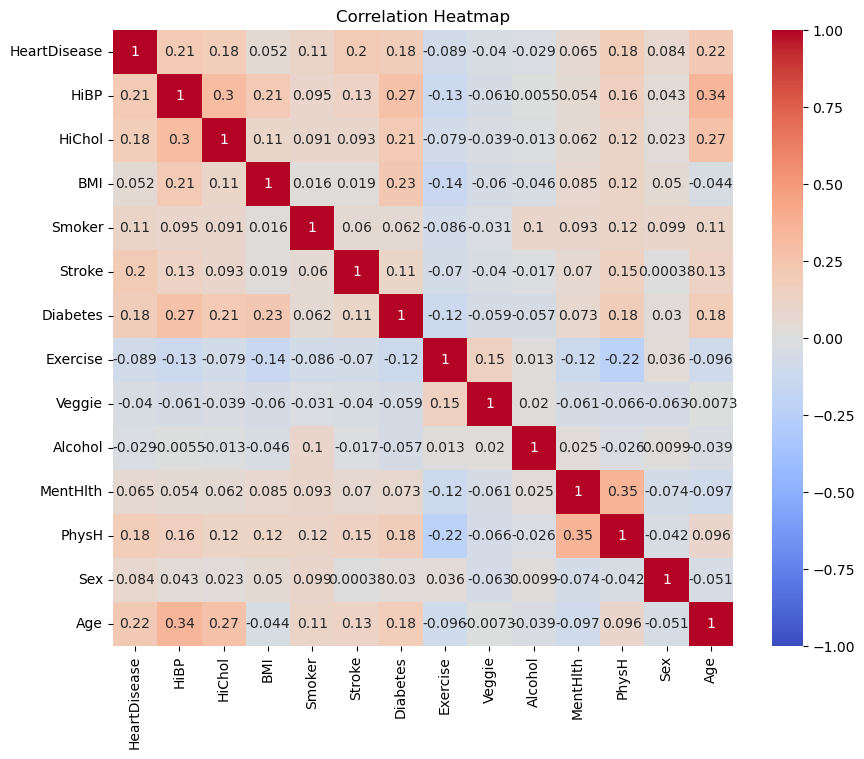

In [66]:
# Compute the correlation matrix
correlation_matrix = ndf.corr()
# Create the correlation heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [67]:
heart_disease_df = ndf[ndf['HeartDisease'] == 1]  # Filter rows where HeartDisease = 1
age_counts = heart_disease_df.groupby('Age').size()  # Group by Age and get the count of each age range

In [68]:
# Define the value labels
value_labels = [
    'Age 18 to 24',
    'Age 25 to 29',
    'Age 30 to 34',
    'Age 35 to 39',
    'Age 40 to 44',
    'Age 45 to 49',
    'Age 50 to 54',
    'Age 55 to 59',
    'Age 60 to 64',
    'Age 65 to 69',
    'Age 70 to 74',
    'Age 75 to 79', 
    'Age 80 to 99',

]

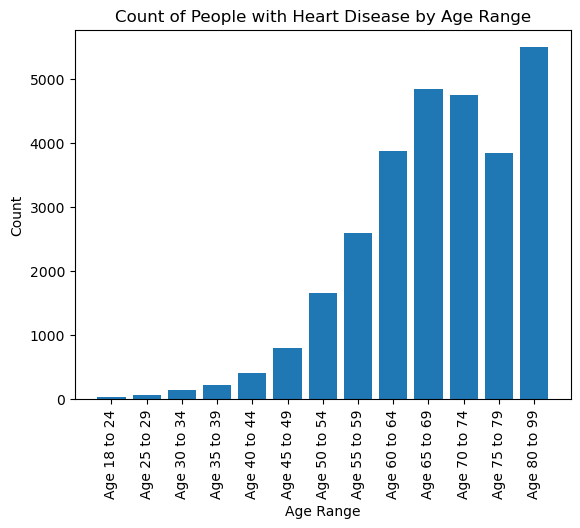

In [69]:
# Plotting the count of people with heart disease in each age range
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Count of People with Heart Disease by Age Range')

# Set the x-axis tick labels using the value labels
plt.xticks(age_counts.index, value_labels, rotation='vertical')

plt.show()

<AxesSubplot:xlabel='HiBP', ylabel='count'>

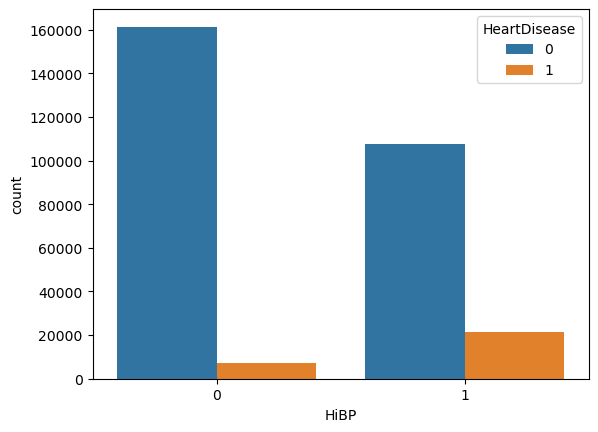

In [70]:
sns.countplot(x='HiBP', data=ndf, hue='HeartDisease')

<AxesSubplot:xlabel='Smoker', ylabel='count'>

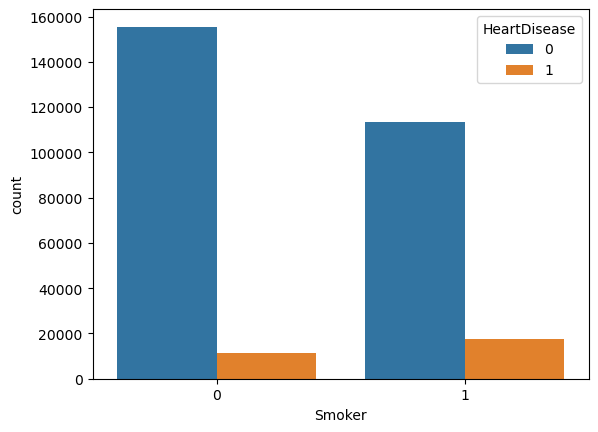

In [75]:
sns.countplot(x='Smoker', data=ndf, hue='HeartDisease')

<AxesSubplot:xlabel='HiChol', ylabel='count'>

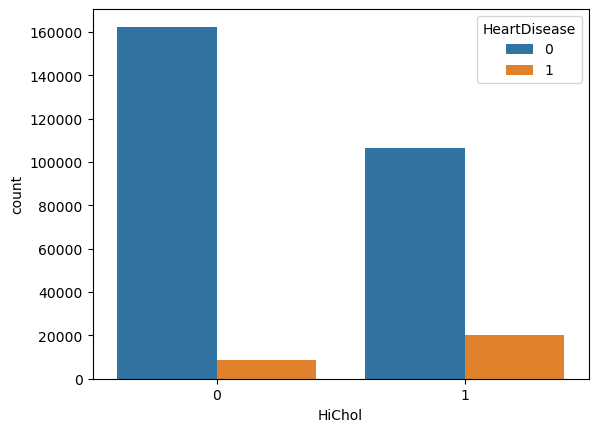

In [72]:
sns.countplot(x='HiChol', data=ndf, hue='HeartDisease')

<AxesSubplot:xlabel='Diabetes', ylabel='count'>

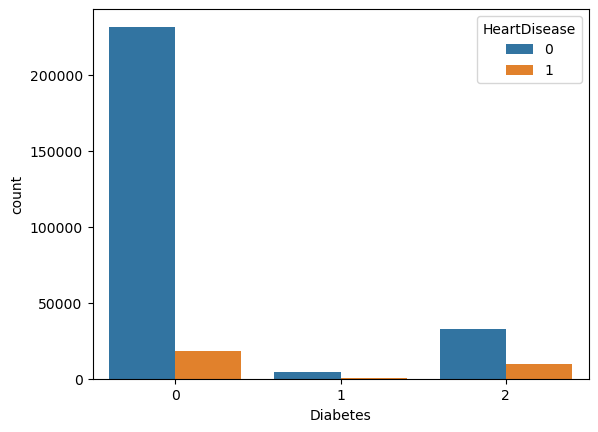

In [74]:
sns.countplot(x='Diabetes', data=ndf, hue='HeartDisease')

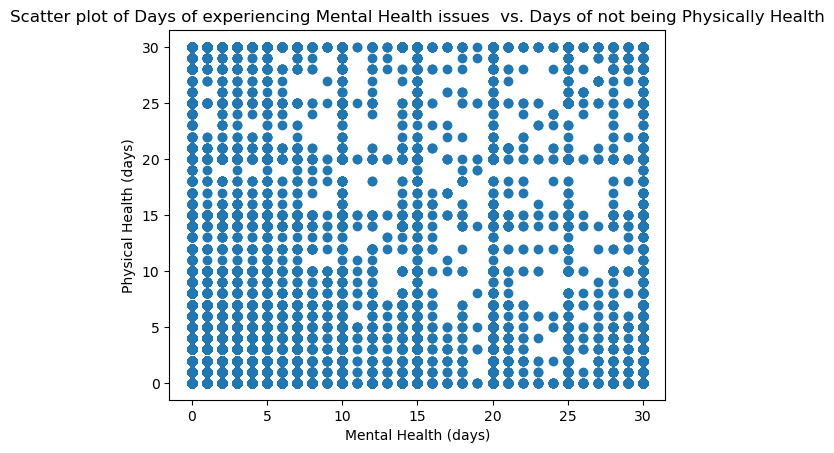

In [76]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(df['MentHlth'], df['PhysH'])

# Title and labels
plt.title('Scatter plot of Days of experiencing Mental Health issues  vs. Days of not being Physically Health')
plt.xlabel('Mental Health (days)')
plt.ylabel('Physical Health (days)')

# Display the plot
plt.show()


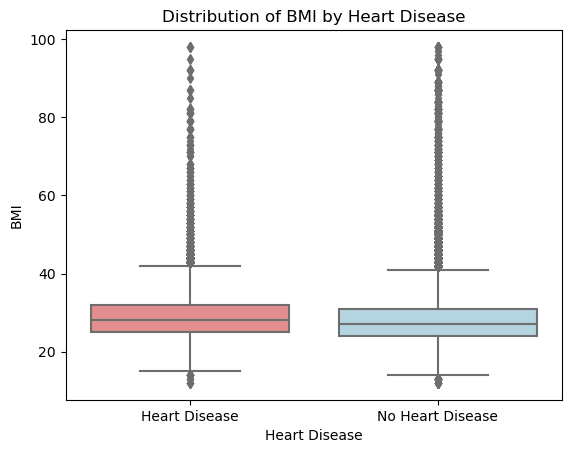

In [78]:

# Create two data subsets: one for heart disease present and one for heart disease absent
heart_disease_present = ndf[ndf['HeartDisease'] == 1]
heart_disease_absent = ndf[ndf['HeartDisease'] == 0]

# Combine the two subsets into a single DataFrame for plotting
data = pd.concat([heart_disease_present['BMI'], heart_disease_absent['BMI']], axis=1)
data.columns = ['Heart Disease', 'No Heart Disease']

# Plot the box plot
sns.boxplot(data=data, palette=['lightcoral', 'lightblue'])

# Add labels and title
plt.xlabel('Heart Disease')
plt.ylabel('BMI')
plt.title('Distribution of BMI by Heart Disease')

# Show the plot
plt.show()


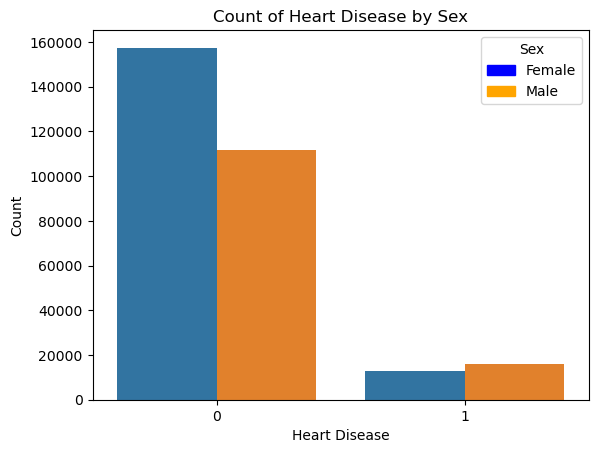

In [80]:
# Group the data by 'HeartDisease' and 'Sex' and count the occurrences
grouped_data = ndf.groupby(['HeartDisease', 'Sex']).size().reset_index(name='Count')

# Create the countplot with labeled hue
sns.countplot(x='HeartDisease', data=ndf, hue='Sex')

# Customize the plot
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Count of Heart Disease by Sex')

# Create a custom legend with labeled sex categories and colors
sex_labels = ['Female', 'Male']
sex_colors = ['blue', 'orange']
legend_elements = [plt.Rectangle((0, 0), 1, 1, color=color) for color in sex_colors]
plt.legend(legend_elements, sex_labels, title='Sex')

# Show the plot
plt.show()


<AxesSubplot:xlabel='HeartDisease', ylabel='PhysH'>

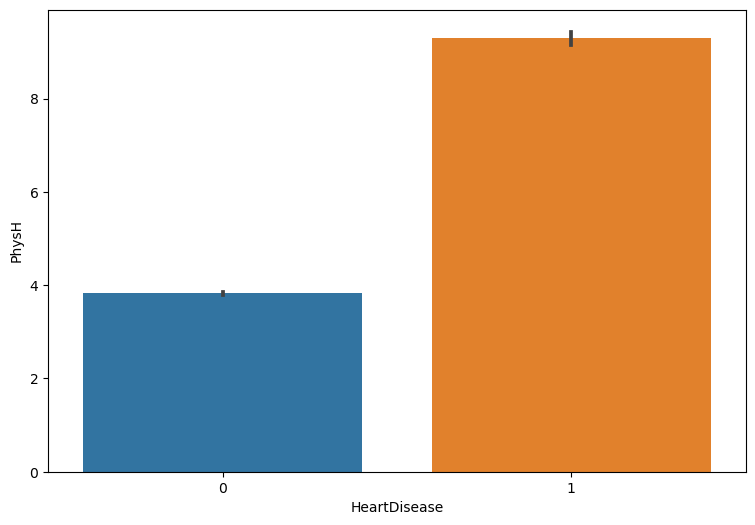

In [84]:

fig = plt.figure(figsize = (9,6))
sns.barplot(x = 'HeartDisease', y = 'PhysH', data = ndf)

<AxesSubplot:xlabel='HeartDisease', ylabel='MentHlth'>

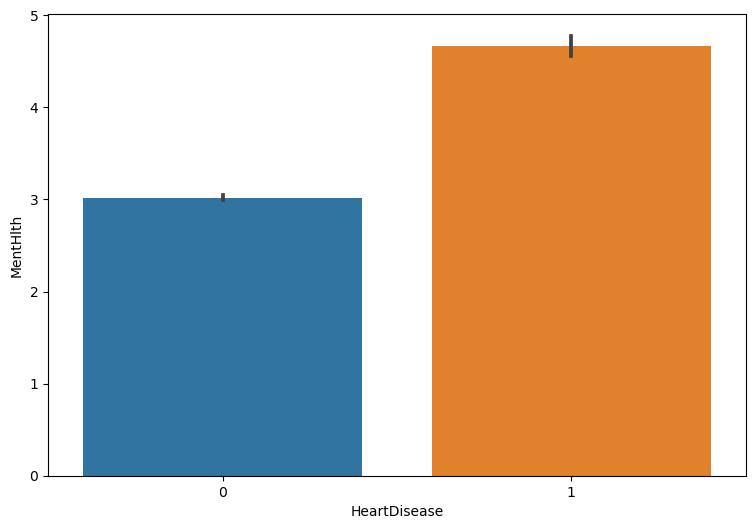

In [86]:

fig = plt.figure(figsize = (9,6))
sns.barplot(x = 'HeartDisease', y = 'MentHlth', data = ndf)

<AxesSubplot:xlabel='Veggie', ylabel='count'>

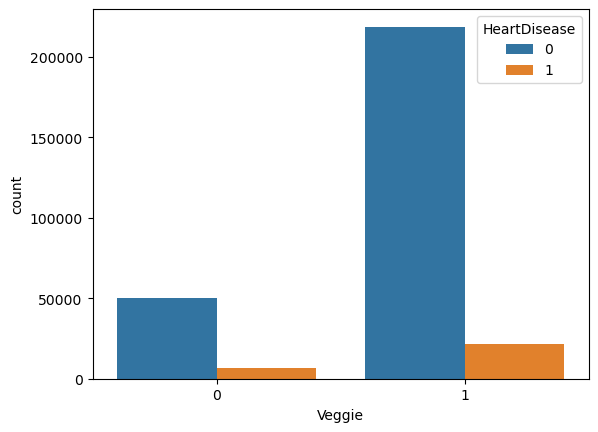

In [87]:
sns.countplot(x='Veggie', data=ndf, hue='HeartDisease')

<AxesSubplot:xlabel='Exercise', ylabel='count'>

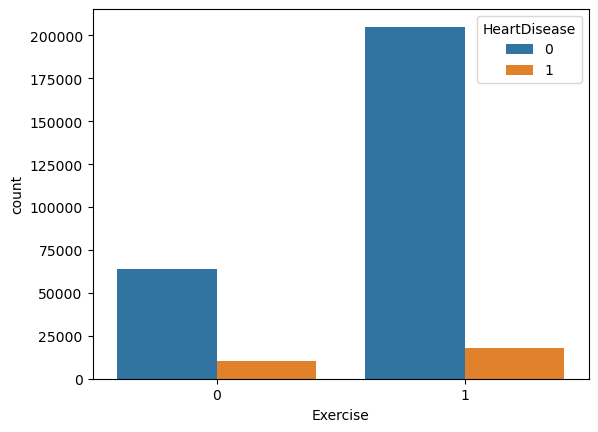

In [88]:
sns.countplot(x='Exercise', data=ndf, hue='HeartDisease')

<AxesSubplot:xlabel='Alcohol', ylabel='count'>

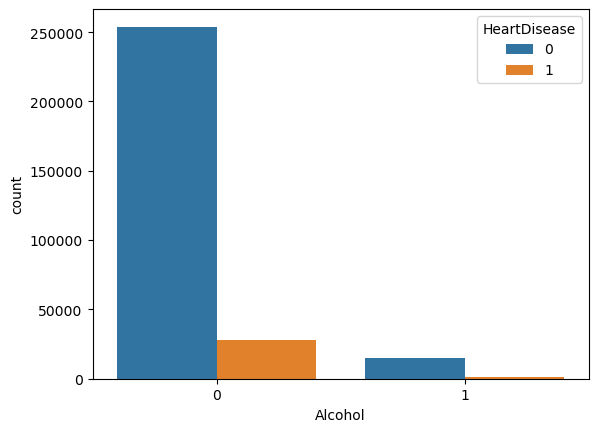

In [89]:
sns.countplot(x='Alcohol', data=ndf, hue='HeartDisease')